<h1>PROJECT CITYBIKE LUBLIN 

<span style="color:green">Import all nessesary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

<h1>CITYBIKE 2016

<h3> 1.READ DATA

<span style="color:green">Let's read data from 2016.xlsx file.

In [34]:
city_bike16 = pd.read_excel('2016.xlsx',sheet_name= ['marzec','kwiecień','maj','czerwiec','lipiec','sierpień','wrzesień', 'październik','listopad'])

In [33]:
#You have to merge dataframes by using 'concat'

city_bike16 = pd.concat(objs=[city_bike16['marzec'],city_bike16['kwiecień'],city_bike16['maj'],city_bike16['czerwiec'],city_bike16['lipiec'],city_bike16['sierpień'],city_bike16['wrzesień'], city_bike16['październik'],city_bike16['listopad']], ignore_index=True)
city_bike16.sample(3)

KeyError: 'marzec'

<span style="color:green">What would you like to  know about data?
    
<span style="color:green">Use DataFrame.info() and get information about:
    
<span style="color:green">-numbers of rows and coulmns 
    
<span style="color:green">-types of data
    
<span style="color:green">-are there missing values? 
    
<span style="color:green">-how many memory we need

In [4]:
city_bike16.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844143 entries, 0 to 844142
Data columns (total 8 columns):
uid               844143 non-null int64
bike_name         844143 non-null int64
start_time        844143 non-null datetime64[ns]
end_time          844143 non-null datetime64[ns]
start_place_id    844143 non-null int64
end_place_id      844143 non-null int64
price             844143 non-null int64
cust_id           844143 non-null int64
dtypes: datetime64[ns](2), int64(6)
memory usage: 51.5 MB


<span style="color:green">There are 201078 rows and 8 columns.

<span style="color:green">Dtypes: datetime64(2), int64(6)

<span style="color:green">There are not missing value - every columns has the same num non-null values

<span style="color:green">We use 51.5MB

In [5]:
#You can also use DataFrame.shape to get num of rows and columns and DataFrame.isnull to get num of non-null values

print(city_bike16.shape )

print(city_bike16.isnull().any().any()) #False means that you don't have any non-missing values

(844143, 8)
False


In [6]:
#Create additional TIME columns so it would be easier to manipulate the data

city_bike16['start_day'] = pd.DatetimeIndex(city_bike16['start_time']).dayofyear

city_bike16['start_month'] = pd.DatetimeIndex(city_bike16['start_time']).month

city_bike16['day_of_month'] = pd.DatetimeIndex(city_bike16['start_time']).day

city_bike16['day_of_week'] = pd.DatetimeIndex(city_bike16['start_time']).dayofweek



#Create additional duration column so it would be easier to manipulate the data

city_bike16['duration'] = city_bike16['end_time']-city_bike16['start_time']

city_bike16['duration_sec']= pd.TimedeltaIndex(city_bike16['end_time']-city_bike16['start_time']).seconds

city_bike16['duration_min'] = city_bike16['duration_sec'] / 60

city_bike16['duration_hour'] = city_bike16['duration_sec']/3600

city_bike16.sample(5)

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id,start_day,start_month,day_of_month,day_of_week,duration,duration_sec,duration_min,duration_hour
566411,20994051,69690,2016-07-19 11:04:43,2016-07-19 11:20:31,315267,315251,0,1383196,201,7,19,1,00:15:48,948,15.800000,0.263333
452631,19718097,69184,2016-06-21 21:00:43,2016-06-21 21:14:02,315242,315239,0,889321,173,6,21,1,00:13:19,799,13.316667,0.221944
287627,18210915,69032,2016-05-25 13:53:00,2016-05-25 14:06:00,315238,315245,0,905596,146,5,25,2,00:13:00,780,13.000000,0.216667
780412,24325191,69561,2016-09-29 01:30:18,2016-09-29 01:37:19,673887,673880,0,1888912,273,9,29,3,00:07:01,421,7.016667,0.116944
647092,22126504,69366,2016-08-12 16:34:20,2016-08-12 16:49:13,315265,315269,0,1012838,225,8,12,4,00:14:53,893,14.883333,0.248056


<h3>2.DATA ANALYSIS

In [7]:
#For how many days were the bikes available for rental?

num_of_days = city_bike16['start_day'].nunique()

print(f'The bikes were available for rental for {num_of_days} dyas')

The bikes were available for rental for 255 dyas


In [8]:
#How many rentals and bikes were there?

num_of_bikes = city_bike16['bike_name'].nunique()

num_of_rent = city_bike16['bike_name'].count()

print(f'Count of rentals:{num_of_rent}, \nCount of bikes: {num_of_bikes}')

Count of rentals:844143, 
Count of bikes: 911


In [9]:
#The average time of a rental:

avg_time = city_bike16['duration_min'].mean()

print(f'The average time of rental: {avg_time}')

The average time of rental: 16.441374802610177


In [10]:
#Rentals under 15 minutes

rentals_under_15 = len(city_bike16[city_bike16['duration_min']<15])

print('Num of rentals under 15 minutes:', rentals_under_15)

Num of rentals under 15 minutes: 565553


In [11]:
#Number of rentals per month, most popular month

month = {3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November'}

top_month = city_bike16.groupby('start_month').agg({'bike_name':'count'}).sort_values(by='bike_name', ascending=False).iloc[0].name

print(f'The most popular month is: {month[top_month]}')

city_bike16.groupby('start_month').agg({'bike_name':'count'}).sort_values(by=['bike_name'], ascending=False)


The most popular month is: May


,bike_name
start_month,
5,172075
6,164759
4,142439
7,114240
8,93398
9,81702
10,37426
11,20777
3,17327


In [12]:
#Daily top score

city_bike16['date'] = pd.DatetimeIndex(city_bike16['start_time']).date

top_day = city_bike16.groupby('date').agg({'bike_name':'count'}).sort_values(by='bike_name', ascending=False).iloc[0].name

print(f'The most popular day: {top_day}')


city_bike16.groupby(['start_day']).agg({'bike_name':'count'}).sort_values(by=['bike_name'],ascending=False).head(1)


The most popular day: 2016-05-12


,bike_name
start_day,
133,7971


In [13]:
#Most popular start station

top_s_station = city_bike16['start_place_id'].value_counts().head(1).index[0]

print(f'The most popular start station number: {top_s_station}')

The most popular start station number: 315269


In [14]:
#Most popular end station

top_end_station = city_bike16['end_place_id'].value_counts().head(1).index[0]

print(f'The most popular start station number: {top_end_station}')

The most popular start station number: 315269


In [15]:
#How many bikes depart from each station monthly? 

city_bike16.groupby(['start_place_id','start_month'])[['bike_name']].count().head()

bike_name
start_place_id start_month           
0              4                    2
               5                    1
155814         6                    1
155930         4                    1
155998         7                    1

In [16]:
#How many bikes return from each station monthly? 

city_bike16.groupby(['end_place_id','start_month'])[['bike_name']].count().head()

,,bike_name
end_place_id,start_month,
155831,5,1
155918,4,1
155930,4,1
155942,5,1
155998,7,1


In [17]:
#Most rented bike

top_bike = city_bike16['bike_name'].value_counts().head(1).index[0]

#or

top_bike = city_bike16['bike_name'].value_counts().idxmax()

print(f'The most popular bike: {top_bike}')


The most popular bike: 69765


In [18]:
#Check if the most rented bike has visited all the stations during te season? If not what were the not visited stations?


mr_bike = city_bike16[city_bike16['bike_name'] == 69617]

print('The busiest bike visited', mr_bike['end_place_id'].nunique(),'return stations and',mr_bike['start_place_id'].nunique(),
      'departure stations.')

The busiest bike visited 93 return stations and 88 departure stations.


In [19]:
mr_bike = city_bike16[city_bike16['bike_name'] == 69617] #most rented bike

mr_bike['start_place_id'].unique() #stations which was visited by mr_bike

city_bike16['start_place_id'].unique() #all stations

pd.Series(mr_bike['start_place_id'].unique()) #you have to change ndarray to Series

pd.Series(mr_bike['start_place_id'].unique()).index #you need to get index, becouse in the nest step you will use drop method
                                                    #(this method demand a list of rows numbers )

pd.Series(city_bike16['start_place_id'].unique()).drop(pd.Series(mr_bike['start_place_id'].unique()).index) 
#you get list wiht not visited stations

88      692598
89      762445
90      446969
91      536377
92      766173
        ...   
812    2216294
813    2248765
814    2249817
815    2251239
816    2253419
Length: 729, dtype: int64

In [20]:
#Find the longest ride

longest_ride = city_bike16.sort_values(by = ['duration'],ascending=False)

longest_ride.head(10)

longest_ride['duration'].loc[19589]

Timedelta('7 days 15:10:44')

<h3>3.PLOTS

In [21]:
#Create a plot for average rent number per month

average_rent = city_bike16.groupby('start_month').agg({'bike_name':'count'}) #I count num of rent per month

average_rent['num_day_in_month'] = city_bike16.groupby(['start_month'])[['day_of_month']].nunique() #I count num of days in month

average_rent['result'] = average_rent['bike_name']//average_rent['num_day_in_month'] #I count average rent number for every month

average_rent

,bike_name,num_day_in_month,result
start_month,,,
3,17327,11,1575
4,142439,30,4747
5,172075,31,5550
6,164759,30,5491
7,114240,31,3685
8,93398,31,3012
9,81702,30,2723
10,37426,31,1207
11,20777,30,692


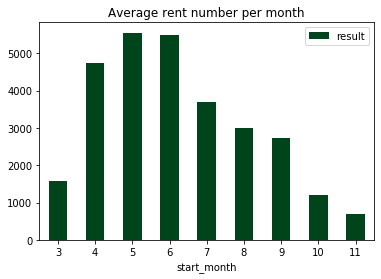

In [37]:
#Use matplotlib
average_rent['result'].plot(kind = 'bar', rot=360, title = 'Average rent number per month', legend = True, colormap = 'Greens_r');

In [39]:
#This is the same plot but by using plotly

fig = go.FigureWidget(data=go.Bar(y=average_rent['result'], x = ['March','April','May','June','July','August','September','October','November']))
fig.update_layout(
    title={
        'text': 'Average rent number per month',
         'font': {
              'family': 'Calibri',
              'size': 30
        },'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='darkkhaki')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None

    )

fig.show()

In [24]:
#Create a plot for average rent number per day of week

city_bike16['day_of_week'] = pd.DatetimeIndex(city_bike16['start_time']).dayofweek #I add a column with day of week 

rent_num_per_day = city_bike16.groupby('day_of_week').agg({'bike_name':['count']}) #I count num of rentals per day of week

rent_num_per_day

,bike_name
,count
day_of_week,
0,120350
1,130315
2,132499
3,137040
4,126537
5,97819
6,99583


In [25]:
num_of_day_df = pd.DataFrame(city_bike16.groupby(['date'])['day_of_week'].unique().value_counts()).sort_index()

rent_num_per_day['num_of_days']=num_of_day_df['day_of_week']

rent_num_per_day['num_per_day'] = rent_num_per_day['bike_name']['count'] / rent_num_per_day['num_of_days']

rent_num_per_day.round(2)

,bike_name,num_of_days,num_per_day
,count,,
day_of_week,,,
0,120350,37,3252.70
1,130315,37,3522.03
2,132499,37,3581.05
3,137040,36,3806.67
4,126537,36,3514.92
5,97819,36,2717.19
6,99583,36,2766.19


In [44]:
fig = px.bar(rent_num_per_day, x=rent_num_per_day.index, y='num_per_day')
fig.update_layout(
    title={
        'text': "Number of rentals per day of week.",
         'font': {
              'family': 'Calibri',
              'size': 30
        },
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='darkolivegreen')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None
    )
fig.show()

In [27]:
#Create a plot for average time of rent per day of week

average_time_of_rent_per_day = city_bike16.groupby('day_of_week').agg({'duration_min':'mean'})
average_time_of_rent_per_day.reset_index(inplace=True)
average_time_of_rent_per_day

,day_of_week,duration_min
0,0,15.319621
1,1,15.760036
2,2,15.092691
3,3,15.546936
4,4,15.409352
5,5,18.570524
6,6,20.933937


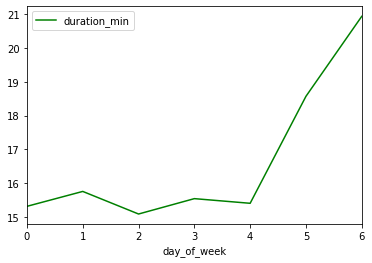

In [45]:
average_time_of_rent_per_day.plot(x = 'day_of_week', y = 'duration_min', kind ='line',color='g');

In [47]:
ig = go.Figure()
fig. add_trace(go.Bar(x=average_time_of_rent_per_day['day_of_week'], y=average_time_of_rent_per_day['duration_min']))
fig.update_layout(
    title={
        'text': 'Average time of rent per day of week',
         'font': {
              'family': 'Calibri',
              'size': 30
        },'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='forestgreen')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None)

fig.show()

In [30]:
#Create a plot for average number of rents per hour (so we can check for example
#how many rents on average are there during rush hours )
city_bike16['start_hour'] = pd.DatetimeIndex(city_bike16['start_time']).hour
ave_rent_per_h = city_bike16.groupby(['start_hour']).agg({'bike_name':'count'})
ave_rent_per_h

,bike_name
start_hour,
0,14685
1,8828
2,5455
3,3477
4,3250
5,6129
6,17842
7,37731
8,27182


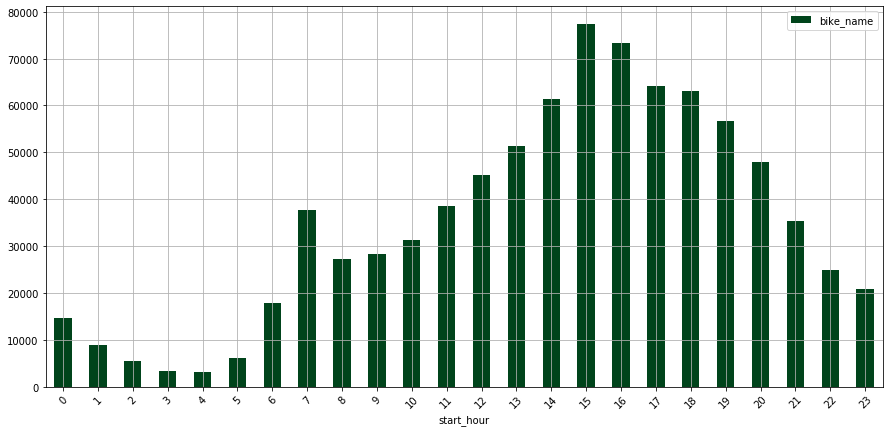

In [49]:
ave_rent_per_h.plot(kind ='bar', figsize = (15,7), use_index=True, xticks = (range(24)),rot = 45, grid=True, colormap = 'PRGn_r');
                   

<h3>4.Conclusions

<span style="color:green">1. The bikes were available by 255 days
    
<span style="color:green">2. The number of available bikes: 91 and they were rented 844143 times
    
<span style="color:green">3. The average time of rent: 16.44
    
<span style="color:green">4. Count of rentals under 15 minutes: 565553 which is more than half all rentals
    
<span style="color:green">5. The most popular month was May, and the most popular day was 2016-05-12, it was Thuersday
    
<span style="color:green">6. The most popular start and end station number: 315269
    
<span style="color:green">7. The most popular bike: 69765
 
<span style="color:green">8. The busiest bike visited 93 return stations and 88 departure stations, not visited 729 stations
    
<span style="color:green">9. The longest ride lasted 7 days 15:10:44
    
<span style="color:green">10. The average rent number per day of week was the highest on Thuersday
    
<span style="color:green">11. The average time of rent per day of week was the highest in Saturday (18.57) and Sunday (20.93)
    
<span style="color:green">12. The most popular hours for rent was beetwen  3 pm and 4 pm